### A notebook just for graphs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

In [3]:
df_melted = pd.read_csv(r'C:\Users\grazk\Documents\Git_project\Final-project\df_melted.csv')
#I went the simplets way and uploaded dataframe from my pc. Kept the name df_melted so it can be coppied to your notebook no problem

In [4]:
#Changing some country names in the df_melted
df_melted.replace({'Country': {'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom', 'Russian Federation': 'Russia', 'Republic of Moldova': 'Moldova', 'Czechia': 'Czech Republic'}}, inplace= True)


In [5]:
#checking if the replace worked as expected
df_melted['Country'].unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic',
       'Denmark', 'Estonia', 'Faroe Islands', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro',
       'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Moldova', 'Romania', 'Russia', 'Serbia', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
      dtype=object)

In [6]:
#want to modify the way date is shown

df_melted['Year'] = pd.to_datetime(df_melted['Year'])



In [7]:
df_melted['year'] = pd.DatetimeIndex(df_melted['Year']).year
df_melted.head(3)

,Country,Item,Year,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha,year
0,Albania,Apples,1961-01-01,0,0,10004,0.0,1961
1,Albania,Apples,1962-01-01,0,0,8039,0.0,1962
2,Albania,Apples,1963-01-01,0,0,7931,0.0,1963


In [8]:
#now there are two date columns, need to get rid of one and rename the other
df_melted.drop(['Year'], axis=1, inplace=True)
df_melted.rename(columns= {'year': 'Year'}, inplace= True)
df_melted.head(3)

,Country,Item,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha,Year
0,Albania,Apples,0,0,10004,0.0,1961
1,Albania,Apples,0,0,8039,0.0,1962
2,Albania,Apples,0,0,7931,0.0,1963


In [9]:
#checking which are most produced in tons
most_produced=df_melted.groupby("Item").sum(numeric_only=True).sort_values(by="Production_t", ascending=False)
most_produced.head(10)
#Surprisingly,  sugar beet is no 1

,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha,Year
Item,,,,,
"Cereals, Total",5358896452,67902707,18530037826,6790.24,3338443
Sugar Crops Primary,202238673,640078744,8483854539,64007.99,2962884
Sugar beet,201908668,639731291,8461256394,63973.28,2962884
Wheat,2350593397,68503215,8288422540,6850.21,3328358
"Roots and Tubers, Total",380659074,381499563,6981021890,38149.95,3563178
Potatoes,379950580,382042314,6973033314,38204.31,3563178
Fruit Primary,469114651,3652384440,4337886890,365238.52,3387623
Barley,1289035236,59009188,4163388325,5901.11,3338443
Vegetables Primary,207493015,396051964,3984466223,39605.33,3445768


In [10]:
#could be skewed due to the fact that unequal number of years might be available for some items. Checking just XXI century

most_produced_2019 = df_melted.loc[df_melted['Year'] >= 2000]
most_produced_2019.groupby("Item").sum(numeric_only=True).sort_values(by="Production_t", ascending=False).head(10)


,Area_ha,Yield_hg_ha,Production_t,Yield_t_ha,Year
Item,,,,,
"Cereals, Total",2391529627,35561636,9123571890,3556.08,1513275
Wheat,1166259144,34784213,4418408890,3478.34,1503190
Sugar Crops Primary,69711618,317291889,3539064550,31729.30,1296153
Sugar beet,69554101,316457017,3527852097,31645.81,1296153
"Roots and Tubers, Total",125437458,187510957,2406413740,18751.05,1583570
Potatoes,125210337,188032428,2403933643,18803.26,1583570
Maize,308119028,39894093,1894874844,3989.38,1181810
Vegetables Primary,76067284,191727909,1766264295,19172.80,1543380
Barley,525591266,29917028,1765153413,2991.86,1513275


#### Top 5 were:
* Wheat
* Sugar beet
* Maize
* Potatoes
* Barley
#### Sugar beet not directly for food, barley I assume might be mostly for beer, so not food either.
#### This leaves 3 main food items: wheat, potatoes, maize

In [11]:
#Staple food production by country
wheat_production_XXI = most_produced_2019.loc[most_produced_2019['Item'] == 'Wheat'].sort_values(by = 'Production_t', ascending = False)
potato_production_XXI = most_produced_2019.loc[most_produced_2019['Item'] == 'Potatoes'].sort_values(by = 'Production_t', ascending = False)
Maize_production_XXI = most_produced_2019.loc[most_produced_2019['Item'] == 'Maize'].sort_values(by = 'Production_t', ascending = False)

#NOT NEEDED FOR PROJECT


In [12]:
def simple_barplot_by_country(df_name, title = ''):
    fig1 = sns.barplot(data=df_name, x= "Country", y= "Production_t")
    plt.xlabel("Country")
    plt.ylabel("Production, tons")
    plt.xticks(rotation = 90)
    plt.title(title)
    
    return fig1

#NOT NEEDED FOR PROJECT

<AxesSubplot: title={'center': 'Wheat production'}, xlabel='Country', ylabel='Production, tons'>

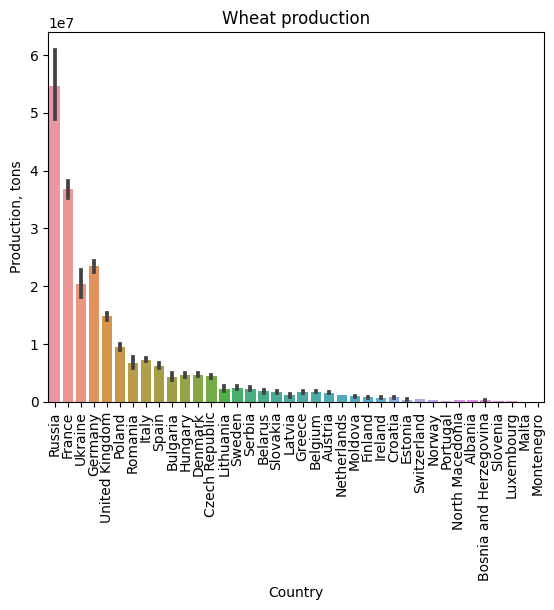

In [13]:
simple_barplot_by_country(wheat_production_XXI, 'Wheat production')
#NOT NEEDED FOR PROJECT

In [15]:

def make_prod_figure(Country, Crop, data = df_melted):
    country_list = data['Country'].tolist()
    crop_list = data['Item'].tolist()
    if Country not in country_list:
        print("No such country")       
    elif Crop not in crop_list:
        print("No such crop")        
    else:
        for_figure = data.loc[(data['Item'] == Crop) & (data['Country'] == Country)]
        fig1 = sns.lineplot(data = for_figure, x= 'Year', y= 'Production_t')
        plt.title(Crop + " production in " + Country)
        plt.xticks(rotation = 90)
        plt.ylabel("Production, tonnes")
        return fig1
    
        # NOT NEEDED FOR PROJECT, TOO SIMPLE AND NOT VERY INTERESTING AS ONLY ONE COUNTRY AND ONLY PRODUCTION IN TONNES CAN BE SEEN.
        
    


<AxesSubplot: title={'center': 'Wheat production in Lithuania'}, xlabel='Year', ylabel='Production, tonnes'>

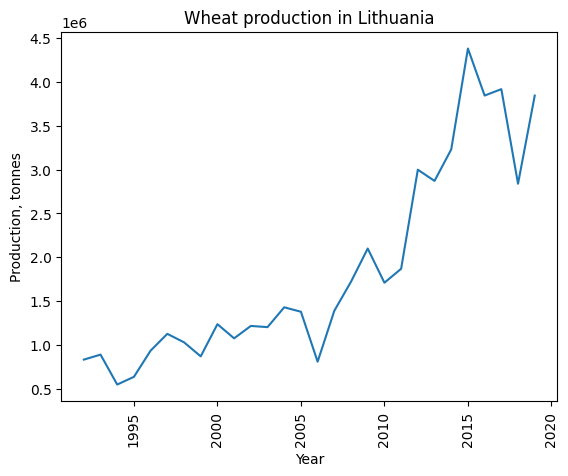

In [16]:


make_prod_figure('Lithuania', 'Wheat')



In [35]:
def plot_agric_prod(data = df_melted):
    country_list = data['Country'].tolist()
    ask_country_list = []
    crop_list = data['Item'].tolist()    
    good = True
    while good:
        country = (input("Enter what country you want to see( please start with capital letter) "))
        if country not in country_list:
            print("No such country, sorry")            
        elif country in ask_country_list:
            print("You already asked for this country")            
        else:
            ask_country_list += [country]
        
        while good:
            is_enough = input("Do you want to continue picking countries? [y/n]")
            if is_enough == "n":
                good = False
            elif is_enough == 'y':
                break
            else:
                print("It seems like you pressed the wrong key. Please try again")
                continue               
            
    while True:
        crop = input("What crop do you want to see(please start with capital letter)?")
        if crop not in crop_list:
            print("No such crop, please try again")
            continue
        else:
            break   
    fig_data = data.loc[(data['Item'] == crop) & (data['Country'].isin(ask_country_list))]
    #dataframe sorted by user choise of country and crop
    while True:
        agric_unit = ['Area_ha', 'Production_t', 'Yield_t_ha']
        category = int(input("What do you want so plot? Agricultural area: type 0; Total production: type 1; Yield tonnes per ha: type 2. [0/1/2]" ))
        if category not in [0, 1, 2]:
            print("Did you accidentally press the wrong key? Please try again")
            continue
        else:
            break
    #now continue with the figure
    plt.figure(figsize = (20, 10))
    fig1 = sns.lineplot(data = fig_data, x= 'Year', y= agric_unit[category], hue= 'Country', marker= 'o')
    fig1.legend(loc='upper right', bbox_to_anchor=(1.07, 1.0))
    x_tick_list = fig_data['Year'].tolist()
    plt.xticks(x_tick_list)
    plt.xticks(rotation = 90)
    plt.title("Production of " + crop)    
             
    
    return fig1

<AxesSubplot: title={'center': 'Production of Barley'}, xlabel='Year', ylabel='Production_t'>

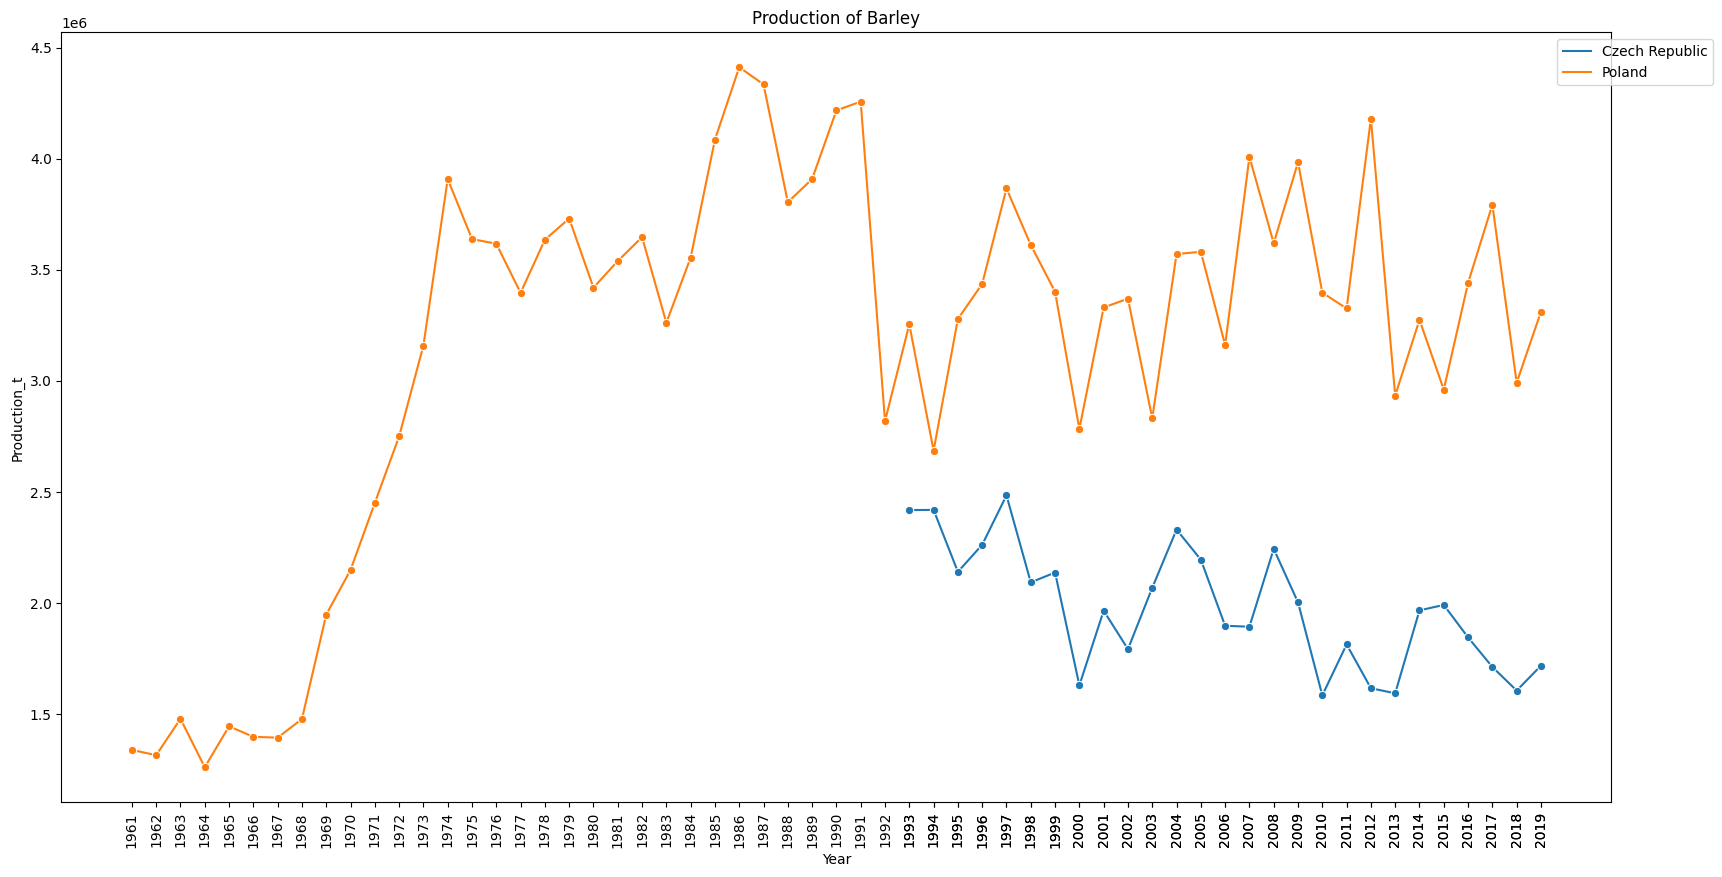

In [38]:
plot_agric_prod()

In [20]:
#function to show whatever crop the user choses and whatever characteristics, area or production or yield per ha
def barplot_by_country(data = df_melted, title = ''):
    crop_list = data['Item'].tolist() 
    while True:
        crop = input("What crop do you want to see(please start with capital letter)?")
        if crop not in crop_list:
            print("No such crop, please try again")
            continue
        else:
            break
        
    while True:
        agric_unit = ['Area_ha', 'Production_t', 'Yield_t_ha']
        category = int(input("What do you want so plot? Agricultural area: type 0; Total production: type 1; Yield tonnes per ha: type 2. [0/1/2]" ))
        if category not in [0, 1, 2]:
            print("Did you accidentally press the wrong key? Please try again")
            continue
        else:
            break
    fig_data =  data.loc[data['Item'] == crop].sort_values(by = agric_unit[category], ascending= False)          
    fig1 = sns.barplot(fig_data, x= "Country", y= agric_unit[category])
    plt.xlabel("Country")
    # plt.ylabel("Production, tons")
    plt.xticks(rotation = 90)
    plt.title(title)
    
    return fig1





<AxesSubplot: title={'center': 'Production of sugar beet'}, xlabel='Country', ylabel='Production_t'>

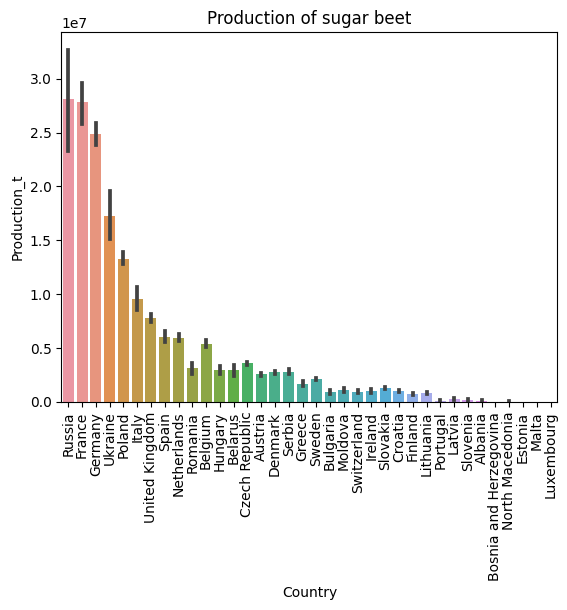

In [22]:
barplot_by_country(df_melted, "Production of sugar beet")
#works as expected